<a href="https://colab.research.google.com/github/allineBrito/Elei-es-2016-x-2020/blob/main/Eleitorado_e_Candidatos2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set()

In [5]:
candidatos = pd.read_csv("/content/drive/MyDrive/eleições/candidatos/candidatos2018.csv", sep=';', encoding='iso-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
eleitorado = pd.read_csv("/content/drive/MyDrive/eleições/eletorado2018.csv", sep=';', encoding='iso-8859-1')

In [7]:
resultado = pd.read_csv("/content/drive/MyDrive/eleições/votacao_candidato_munzona_2018_BRASIL[1].csv", sep=';', encoding='iso-8859-1')

# ***ELEITORADO***

In [ ]:
eleitorado.info()

In [9]:
eleitorado['NM_MUNICIPIO'].nunique()
# O Brasil tem 5570 municípios. Em 2041 municípios os dados do TSE não estavam preenchidos em 05/05/2022

3529

In [10]:
eleitorado.groupby(['DS_FAIXA_ETARIA']).size()

DS_FAIXA_ETARIA
100 anos ou mais                   6099
16 anos                            8583
17 anos                           12983
18 anos                           17594
19 anos                           20410
20 anos                           22955
21 a 24 anos                      38790
25 a 29 anos                      50857
30 a 34 anos                      60939
35 a 39 anos                      70031
40 a 44 anos                      75464
45 a 49 anos                      80383
50 a 54 anos                      87275
55 a 59 anos                      87978
60 a 64 anos                      85035
65 a 69 anos                      77380
70 a 74 anos                      67625
75 a 79 anos                      57046
80 a 84 anos                      46083
85 a 89 anos                      34586
90 a 94 anos                      25005
95 a 99 anos                      14610
Inválido                            864
dtype: int64

In [11]:
eleitorado.groupby('DS_FAIXA_ETARIA')['DS_GENERO'].value_counts(normalize=True)*100

DS_FAIXA_ETARIA                 DS_GENERO    
100 anos ou mais                FEMININO         50.024594
                                MASCULINO        49.073619
                                NÃO INFORMADO     0.901787
16 anos                         MASCULINO        50.180590
                                FEMININO         49.819410
17 anos                         FEMININO         52.553339
                                MASCULINO        47.446661
18 anos                         FEMININO         53.342048
                                MASCULINO        46.657952
19 anos                         FEMININO         54.875061
                                MASCULINO        45.124939
20 anos                         FEMININO         55.465040
                                MASCULINO        44.534960
21 a 24 anos                    FEMININO         54.766692
                                MASCULINO        45.233308
25 a 29 anos                    FEMININO         54.273748
          

In [12]:
escolaridade= eleitorado.groupby('DS_GRAU_ESCOLARIDADE')['DS_GENERO'].value_counts(normalize=True)*100
escolaridade.sort_values(ascending=False) 
#ordem do maior valor

DS_GRAU_ESCOLARIDADE           DS_GENERO    
SUPERIOR COMPLETO              FEMININO         55.487500
ENSINO MÉDIO COMPLETO          FEMININO         54.643975
SUPERIOR INCOMPLETO            FEMININO         53.969255
ENSINO MÉDIO INCOMPLETO        FEMININO         53.616176
ENSINO FUNDAMENTAL COMPLETO    FEMININO         52.511091
ENSINO FUNDAMENTAL INCOMPLETO  FEMININO         51.894712
ANALFABETO                     FEMININO         51.172254
LÊ E ESCREVE                   FEMININO         49.827544
                               MASCULINO        48.307795
ANALFABETO                     MASCULINO        47.718211
NÃO INFORMADO                  FEMININO         47.576138
ENSINO FUNDAMENTAL INCOMPLETO  MASCULINO        47.072532
ENSINO FUNDAMENTAL COMPLETO    MASCULINO        46.910543
NÃO INFORMADO                  MASCULINO        46.207369
ENSINO MÉDIO INCOMPLETO        MASCULINO        46.084082
SUPERIOR INCOMPLETO            MASCULINO        45.860499
ENSINO MÉDIO COMPLETO      

In [13]:
eleitorado[eleitorado["NM_MUNICIPIO"] == 'NITERÓI'][['QT_ELEITORES_PERFIL', 'QT_ELEITORES_DEFICIENCIA', 'QT_ELEITORES_BIOMETRIA', 'QT_ELEITORES_INC_NM_SOCIAL']].sum()

QT_ELEITORES_PERFIL           90537
QT_ELEITORES_DEFICIENCIA       2343
QT_ELEITORES_BIOMETRIA        90453
QT_ELEITORES_INC_NM_SOCIAL        5
dtype: int64

# ***CANDIDATOS***

In [ ]:
candidatos.info()

In [15]:
candidatos.loc [41:43]  #filtrar linhas

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
41,24/04/2022,11:01:20,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,NÃO ELEITO,N,S,-1,"6,00191E+18",2,DEFERIDO,2,DEFERIDO,SIM
42,24/04/2022,11:01:20,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,SUPLENTE,N,N,-1,"6,02951E+18",2,DEFERIDO,2,DEFERIDO,SIM
43,24/04/2022,11:01:20,2018,2,ELEIÇÃO ORDINÁRIA,1,297,Eleições Gerais Estaduais 2018,07/10/2018,ESTADUAL,...,SUPLENTE,N,S,-1,"6,00754E+18",2,DEFERIDO,2,DEFERIDO,SIM


In [16]:
cor = candidatos['DS_COR_RACA'].value_counts (normalize=True)*100 #porcentagem
cor.sort_values(ascending=False)

BRANCA            52.457162
PARDA             35.661412
PRETA             10.839616
AMARELA            0.579164
INDÍGENA           0.459219
NÃO DIVULGÁVEL     0.003427
Name: DS_COR_RACA, dtype: float64

In [17]:
candidatos[candidatos['DS_COR_RACA']=='PARDA'].count()

DT_GERACAO                      10406
HH_GERACAO                      10406
ANO_ELEICAO                     10406
CD_TIPO_ELEICAO                 10406
NM_TIPO_ELEICAO                 10406
                                ...  
CD_SITUACAO_CANDIDATO_PLEITO    10406
DS_SITUACAO_CANDIDATO_PLEITO    10406
CD_SITUACAO_CANDIDATO_URNA      10406
DS_SITUACAO_CANDIDATO_URNA      10406
ST_CANDIDATO_INSERIDO_URNA      10406
Length: 63, dtype: int64

In [18]:
candidatos['DS_GENERO'].value_counts (normalize=True)*100

MASCULINO         68.396162
FEMININO          31.600411
NÃO DIVULGÁVEL     0.003427
Name: DS_GENERO, dtype: float64

In [19]:
idade= candidatos['NR_IDADE_DATA_POSSE'].min()
print("O candidato mais novo possui {} de idade.". format(idade))


O candidato mais novo possui 18.0 de idade.


In [20]:
#quantidade de candidatos por faixa etária específica 
candidatos[candidatos['NR_IDADE_DATA_POSSE'] == 49].count()

DT_GERACAO                      974
HH_GERACAO                      974
ANO_ELEICAO                     974
CD_TIPO_ELEICAO                 974
NM_TIPO_ELEICAO                 974
                               ... 
CD_SITUACAO_CANDIDATO_PLEITO    974
DS_SITUACAO_CANDIDATO_PLEITO    974
CD_SITUACAO_CANDIDATO_URNA      974
DS_SITUACAO_CANDIDATO_URNA      974
ST_CANDIDATO_INSERIDO_URNA      974
Length: 63, dtype: int64

In [21]:
candidatos.filter (items=['DS_GENERO','DS_COR_RACA']).value_counts(normalize=True)*100 #juntar dados

DS_GENERO       DS_COR_RACA   
MASCULINO       BRANCA            36.336532
                PARDA             24.808088
FEMININO        BRANCA            16.120631
                PARDA             10.853324
MASCULINO       PRETA              6.596984
FEMININO        PRETA              4.242632
MASCULINO       AMARELA            0.363263
                INDÍGENA           0.291295
FEMININO        AMARELA            0.215901
                INDÍGENA           0.167923
NÃO DIVULGÁVEL  NÃO DIVULGÁVEL     0.003427
dtype: float64

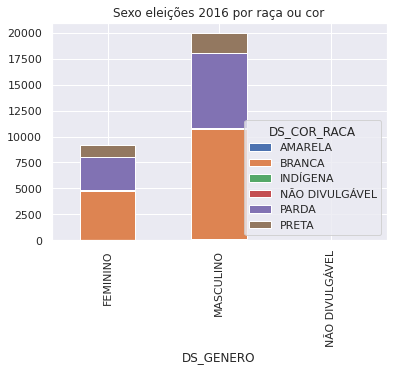

In [22]:
candidatos.groupby('DS_GENERO')['DS_COR_RACA'].value_counts().unstack().plot(kind='bar', stacked=True);

# plt.xticks(rotation=60);
plt.rcParams["figure.figsize"] = (10,10);
plt.title('Sexo eleições 2016 por raça ou cor');

In [28]:
candidatos[candidatos['SG_PARTIDO']=='PSDB']['DS_COR_RACA'].value_counts(normalize=True)*100

BRANCA      65.972945
PARDA       27.679501
PRETA        5.723205
AMARELA      0.520291
INDÍGENA     0.104058
Name: DS_COR_RACA, dtype: float64

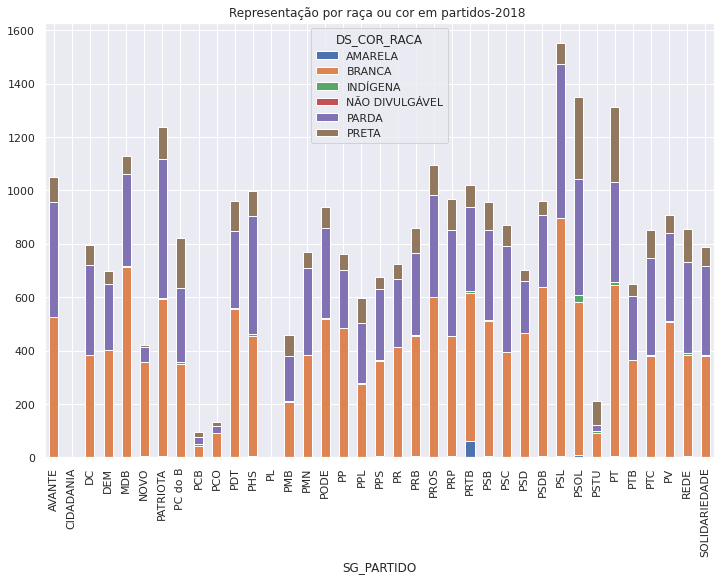

In [39]:
candidatos.groupby('SG_PARTIDO')['DS_COR_RACA'].value_counts().unstack().plot(kind='bar', stacked=True);

# plt.xticks(rotation=60);
plt.rcParams["figure.figsize"] = (12,15);
plt.title('Representação por raça ou cor em partidos-2018 ');

In [23]:
despesa= candidatos['VR_DESPESA_MAX_CAMPANHA'].max()
print(f'Valor máximo, em reais, de despesas de campanha declarada pelo partido: R${despesa:_.0f}')
#formatação númerica

Valor máximo, em reais, de despesas de campanha declarada pelo partido: R$70_000_000


In [24]:
despesaporcor= candidatos[candidatos["DS_COR_RACA"] == 'BRANCA']['VR_DESPESA_MAX_CAMPANHA'].mean()
round(despesaporcor)
print(f'Média do valor máximo, em reais, de despesas de campanha declarada pelo partido por raça ou cor: R${despesaporcor:_.0f}')

Média do valor máximo, em reais, de despesas de campanha declarada pelo partido por raça ou cor: R$1_707_137
